<a href="https://colab.research.google.com/github/MeyyappanIsATechie/medical_insurance_fraud_detection/blob/main/MIFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [ ]:
path="/content/drive/MyDrive/MIFD/Train_Beneficiarydata-1542865627584.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
df.isnull()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138552,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138553,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138554,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [ ]:
df['DOD'].dropna(inplace=True)
df.dropna(inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)


In [ ]:
duplicate_rows = df.duplicated()
duplicate_rows_df = df[duplicate_rows]
print(duplicate_rows_df)


Empty DataFrame
Columns: [BeneID, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt]
Index: []

[0 rows x 25 columns]


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
206,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,1,1,2,0,0,3880,650
207,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,1,1,2,1,19000,1068,110,50
219,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,2,1,1,1,2,2,4000,1068,300,30
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,2,1,2,2,2,0,0,50,80


KeyboardInterrupt: ignored

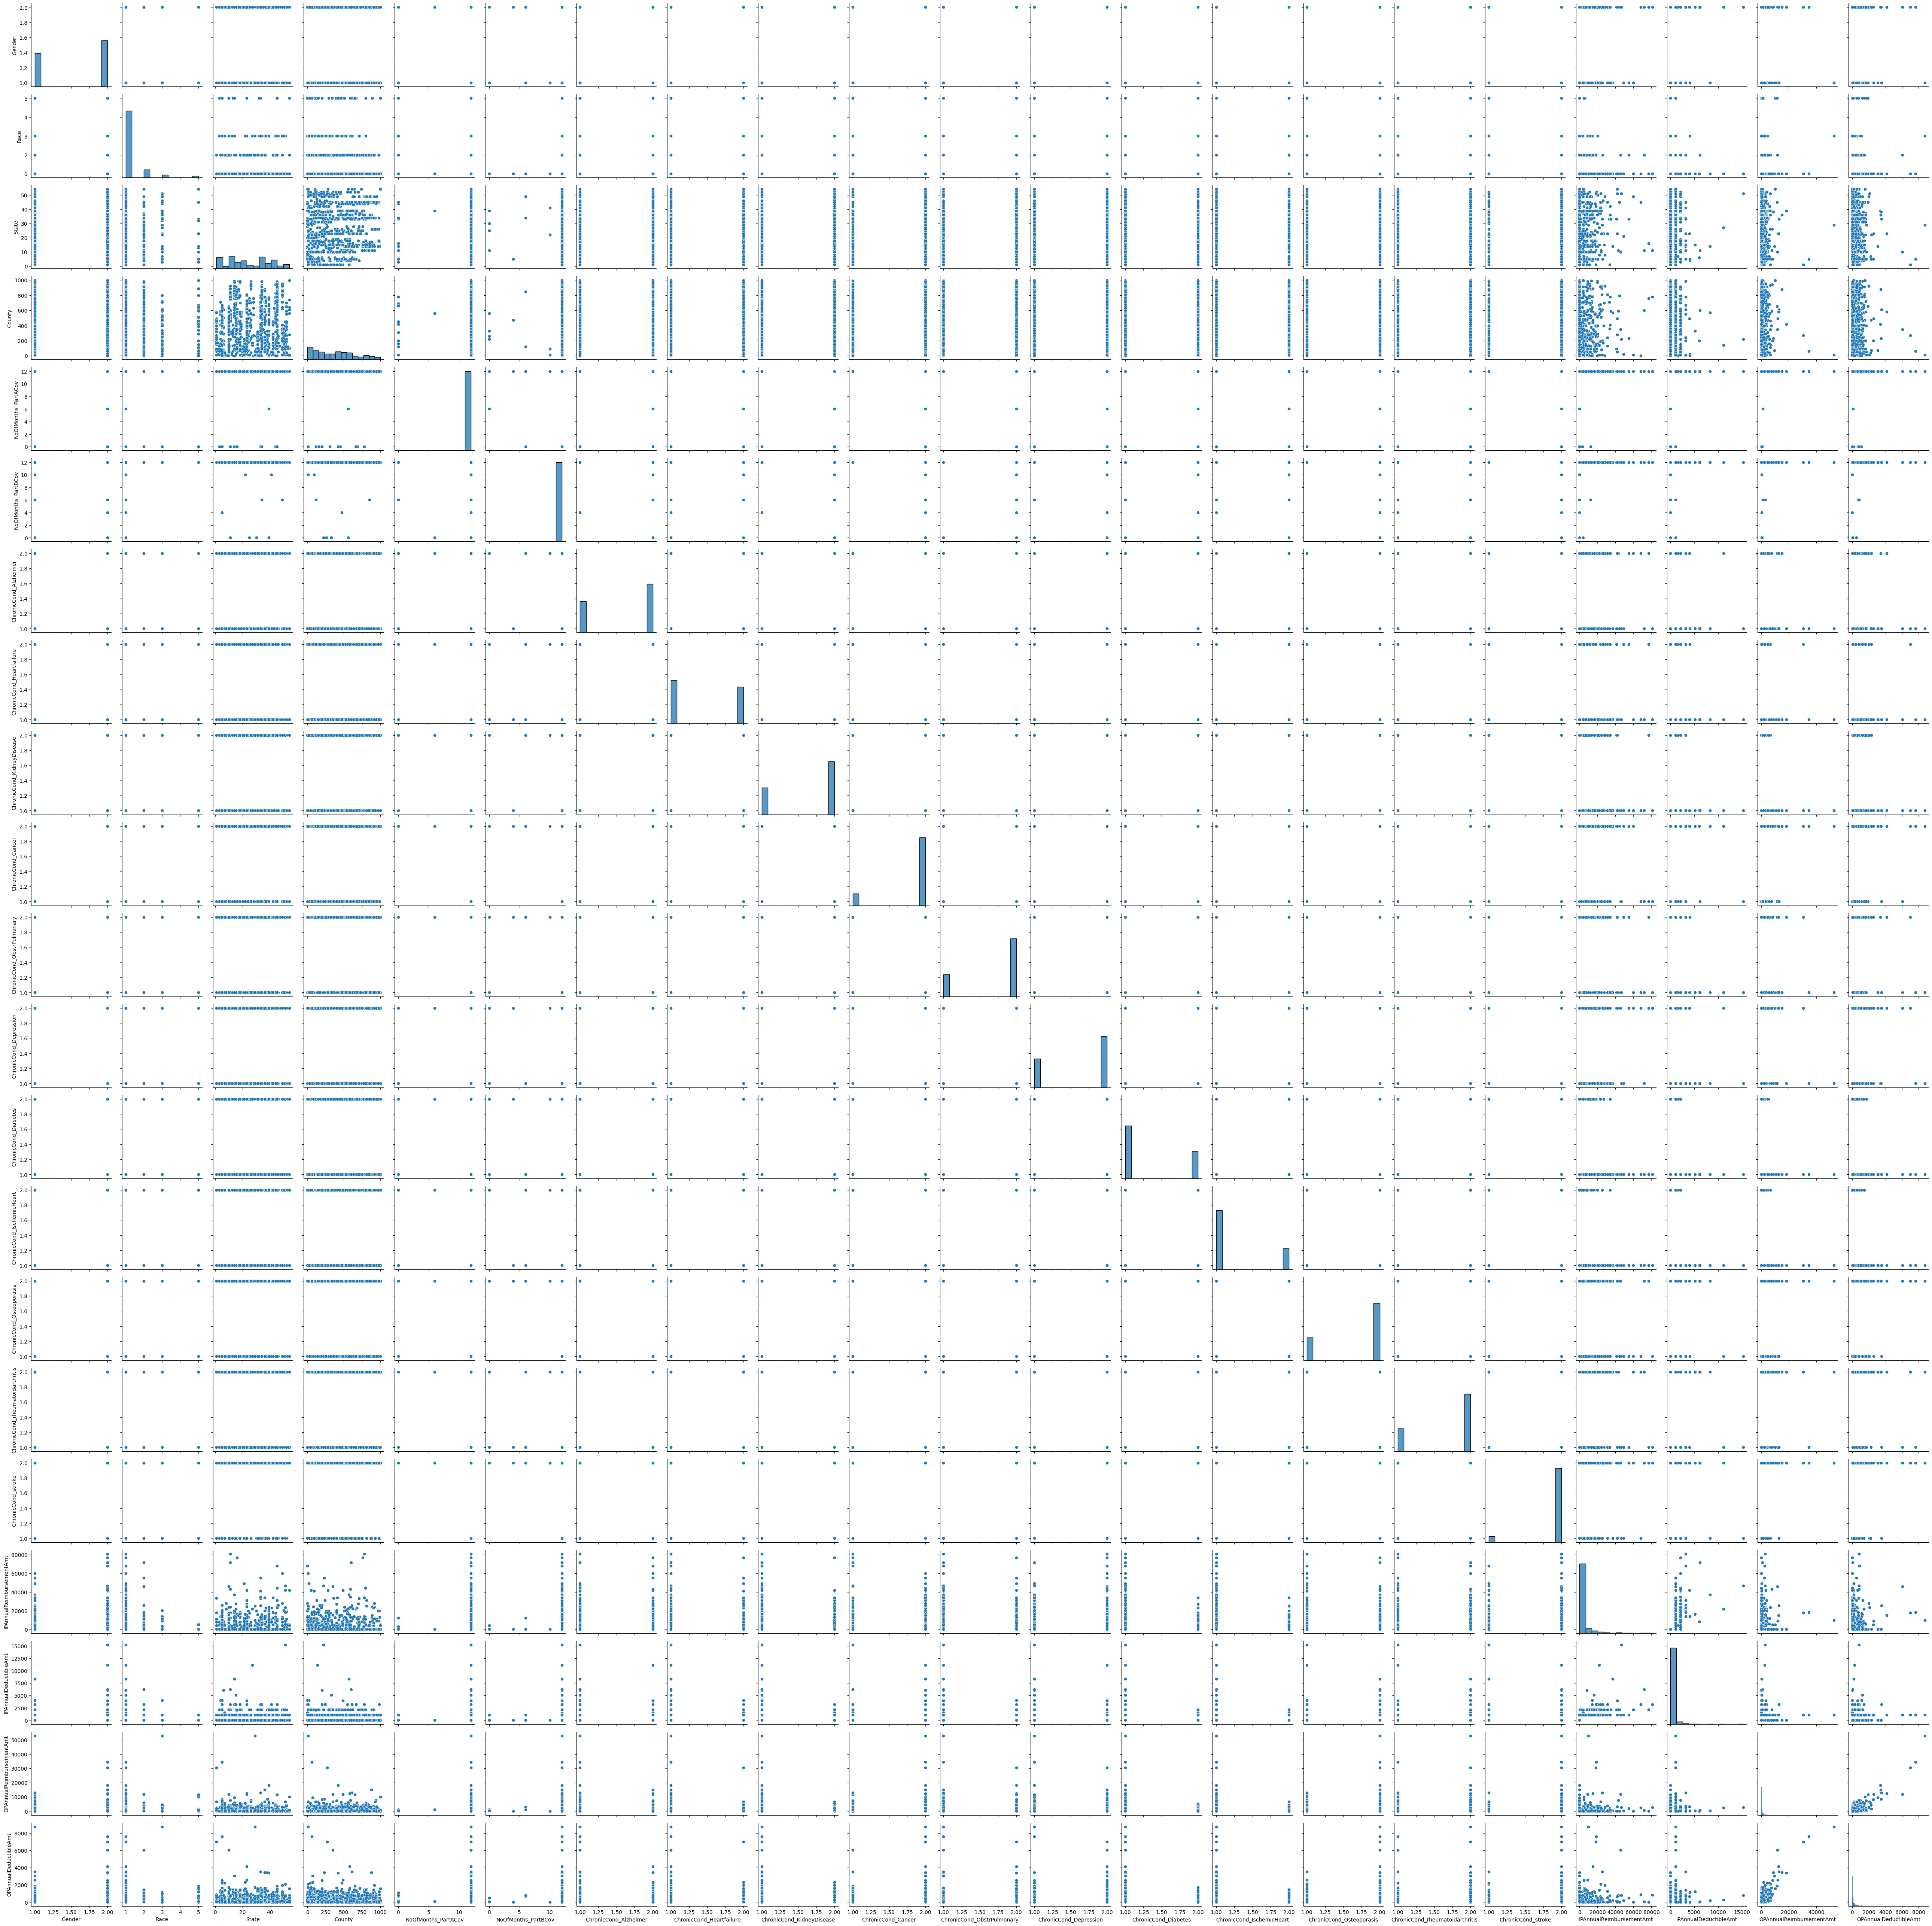

In [ ]:
# Pairplot for overall exploration
sns.pairplot(df)
plt.show()

# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df1 = pd.DataFrame(df)

# Add a new column to store the original index
df1['original_index'] = df1.index

# Remove duplicates and reset index
train_benficiary_data = df1.drop_duplicates().reset_index(drop=True)


In [ ]:
df1.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,original_index
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,2,1,1,2,0,0,1490,160,6
206,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,1,2,0,0,3880,650,206
207,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,1,2,1,19000,1068,110,50,207
219,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,1,1,1,2,2,4000,1068,300,30,219
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,1,2,2,2,0,0,50,80,525


In [ ]:
train_benficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,original_index
0,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,2,1,1,2,0,0,1490,160,6
1,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,1,2,0,0,3880,650,206
2,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,1,2,1,19000,1068,110,50,207
3,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,1,1,1,2,2,4000,1068,300,30,219
4,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,1,2,2,2,0,0,50,80,525


In [ ]:
train_benficiary_data.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,original_index
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.00000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.578466,1.263899,25.236453,381.534131,11.902885,11.949331,1.60943,1.456721,1.663617,1.851513,...,1.340605,1.261084,1.717101,1.717804,1.926812,2637.361013,296.579873,939.296270,269.915552,68314.888811
std,0.493979,0.733522,15.157403,273.864212,1.063676,0.710263,0.48805,0.498299,0.472638,0.355707,...,0.474080,0.439380,0.450567,0.450227,0.260536,7742.653774,839.667568,2368.056952,562.653165,39104.899385
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.00000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,90.000000,20.000000,35444.000000
50%,2.000000,1.000000,23.000000,360.000000,12.000000,12.000000,2.00000,1.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,330.000000,100.000000,66801.000000
75%,2.000000,1.000000,38.000000,580.000000,12.000000,12.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,940.000000,300.000000,101549.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,81000.000000,15272.000000,52900.000000,8750.000000,138061.000000


In [ ]:
train_benficiary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           1421 non-null   object
 1   DOB                              1421 non-null   object
 2   DOD                              1421 non-null   object
 3   Gender                           1421 non-null   int64 
 4   Race                             1421 non-null   int64 
 5   RenalDiseaseIndicator            1421 non-null   object
 6   State                            1421 non-null   int64 
 7   County                           1421 non-null   int64 
 8   NoOfMonths_PartACov              1421 non-null   int64 
 9   NoOfMonths_PartBCov              1421 non-null   int64 
 10  ChronicCond_Alzheimer            1421 non-null   int64 
 11  ChronicCond_Heartfailure         1421 non-null   int64 
 12  ChronicCond_KidneyDisease        1

In [ ]:
train_benficiary_data['DOB'] = pd.to_datetime(train_benficiary_data['DOB'], format='%Y-%m-%d')
train_benficiary_data['DOD'] = pd.to_datetime(train_benficiary_data['DOD'], format='%Y-%m-%d')
train_benficiary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   BeneID                           1421 non-null   object        
 1   DOB                              1421 non-null   datetime64[ns]
 2   DOD                              1421 non-null   datetime64[ns]
 3   Gender                           1421 non-null   int64         
 4   Race                             1421 non-null   int64         
 5   RenalDiseaseIndicator            1421 non-null   object        
 6   State                            1421 non-null   int64         
 7   County                           1421 non-null   int64         
 8   NoOfMonths_PartACov              1421 non-null   int64         
 9   NoOfMonths_PartBCov              1421 non-null   int64         
 10  ChronicCond_Alzheimer            1421 non-null   int64      

In [ ]:
# Handle missing values (e.g., imputation, removal, etc.)
train_benficiary_data.fillna(method='ffill', inplace=True)
path="/content/drive/MyDrive/MIFD/Train-1542865627584.csv"
res=pd.read_csv(path)
res.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


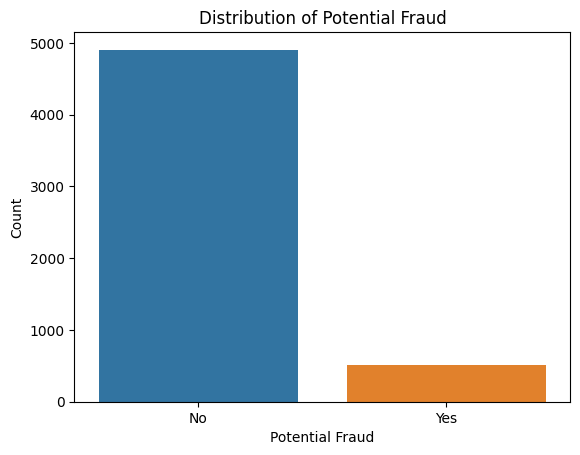

In [ ]:
sns.countplot(x='PotentialFraud', data=res)
plt.title('Distribution of Potential Fraud')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
# Summary statistics for numeric columns
train_benficiary_data.describe()

# Summary statistics for categorical columns
train_benficiary_data.describe(include='object')


,BeneID,RenalDiseaseIndicator
count,1421,1421
unique,1421,2
top,BENE11007,0
freq,1,1216


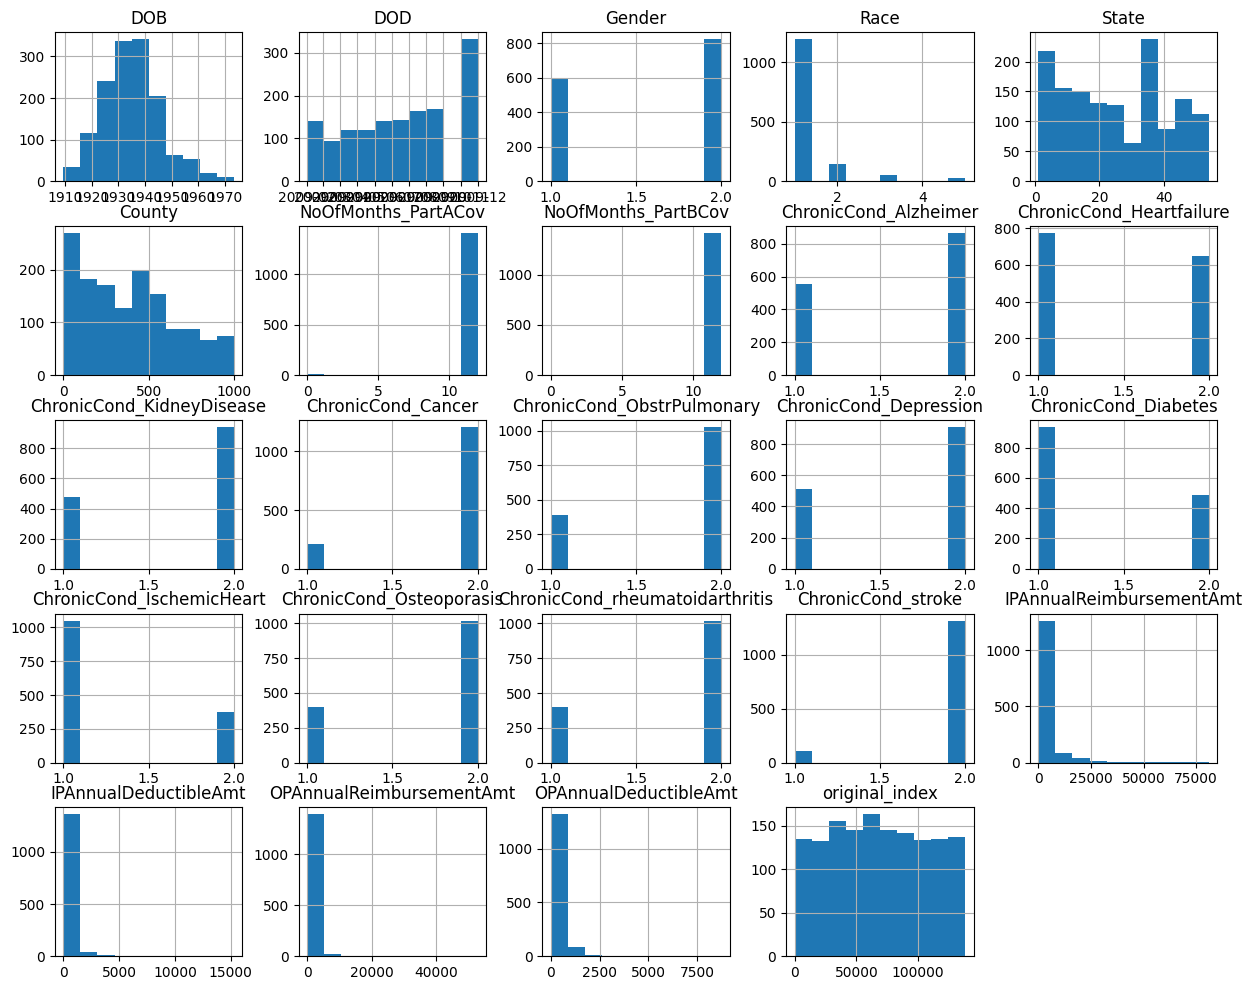

In [ ]:
# Plotting histograms for numeric columns
train_benficiary_data.hist(figsize=(15, 12))
plt.show()

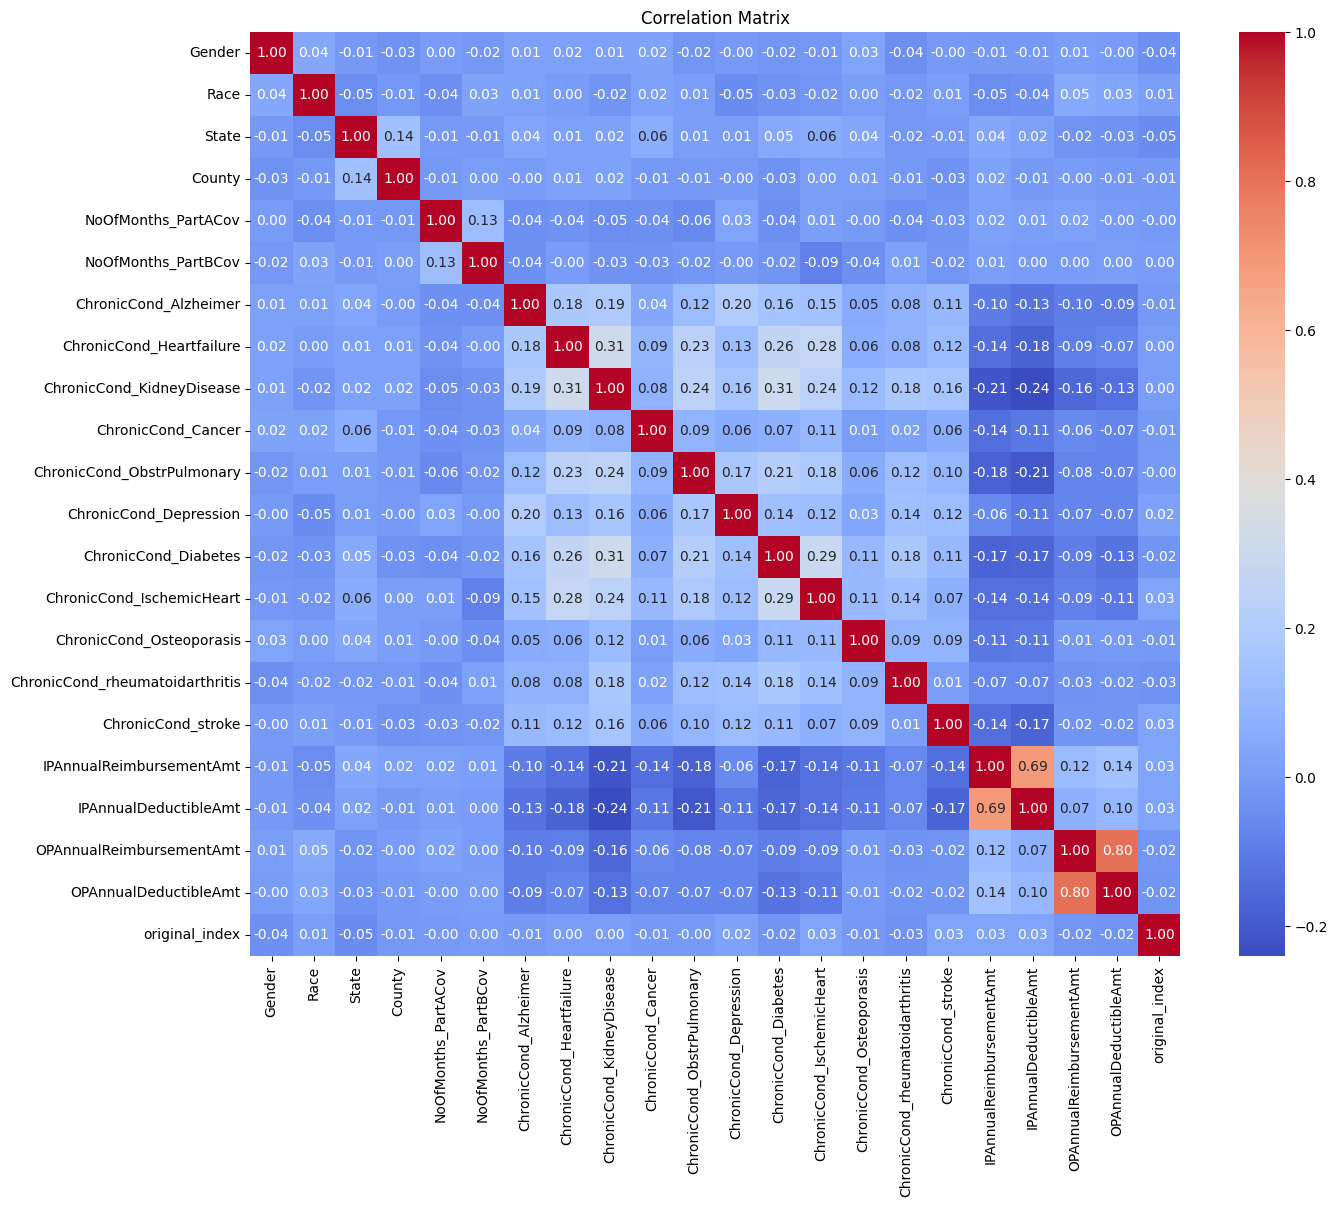

In [ ]:
# Compute correlation matrix
correlation_matrix = train_benficiary_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


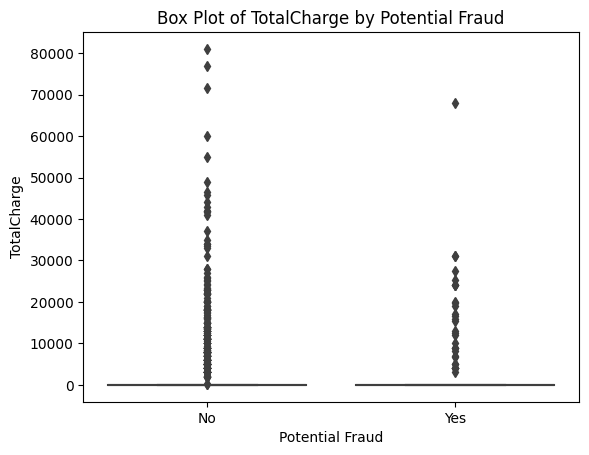

In [ ]:
# Box plot for a specific numeric column (e.g., TotalCharge)
sns.boxplot(x=res['PotentialFraud'], y=train_benficiary_data['IPAnnualReimbursementAmt'])
plt.title('Box Plot of TotalCharge by Potential Fraud')
plt.xlabel('Potential Fraud')
plt.ylabel('TotalCharge')
plt.show()


In [ ]:
# Count of unique values for a categorical variable (e.g., PotentialFraud)
res['PotentialFraud'].value_counts()



No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to a categorical column
label_encoder = LabelEncoder()
res['potential fraud_encoded'] = label_encoder.fit_transform(res['PotentialFraud'])
res.head()


,Provider,PotentialFraud,potential fraud_encoded
0,PRV51001,No,0
1,PRV51003,Yes,1
2,PRV51004,No,0
3,PRV51005,Yes,1
4,PRV51007,No,0


In [ ]:


path="/content/drive/MyDrive/MIFD/Train_Inpatientdata-1542865627584.csv"
train_inpatient_data=pd.read_csv(path)
# Fill missing values with the mode (most frequent value)
train_inpatient_data['OperatingPhysician'].fillna(train_inpatient_data['OperatingPhysician'].mode()[0], inplace=True)
train_inpatient_data['OtherPhysician'].fillna(train_inpatient_data['OtherPhysician'].mode()[0], inplace=True)
train_inpatient_data.head()


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY429430,PHY416093,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY416093,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY429430,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,PHY416093,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


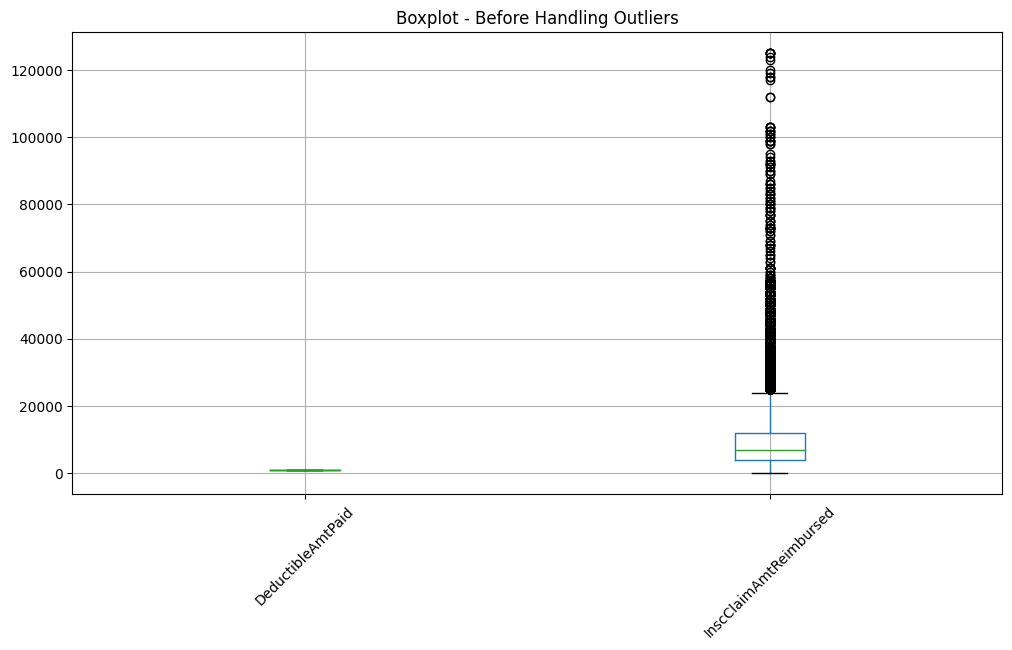

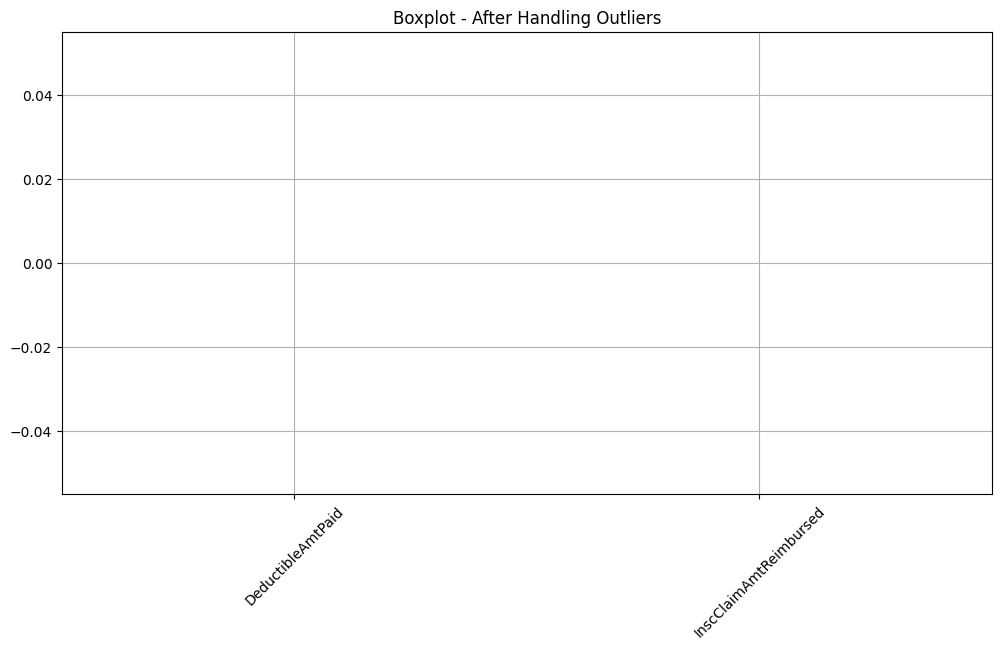

In [ ]:

from scipy.stats import zscore
# Select the columns for demonstration (you can modify this based on your dataset)
columns_to_plot = ['DeductibleAmtPaid', 'InscClaimAmtReimbursed']

# Visualize the boxplots before handling outliers
plt.figure(figsize=(12, 6))
train_inpatient_data[columns_to_plot].boxplot()
plt.title('Boxplot - Before Handling Outliers')
plt.xticks(rotation=45)
plt.show()

# Calculate the Z-scores for the selected columns
z_scores = np.abs(zscore(train_inpatient_data[columns_to_plot]))

# Define a threshold for outliers (e.g., Z-score greater than 3)
threshold = 3

# Identify and remove rows with outliers
outlier_indices = np.where(z_scores > threshold)
train_inpatient_data_no_outliers = train_inpatient_data[(z_scores <= threshold).all(axis=1)]

# Visualize the boxplots without outliers
plt.figure(figsize=(12, 6))
train_inpatient_data_no_outliers[columns_to_plot].boxplot()
plt.title('Boxplot - After Handling Outliers')
plt.xticks(rotation=45)
plt.show()
